# Virtual Algorithmic Tradebot


Algorithmic trading uses a program that follows a defined set of instructions (an algorithm/strategy) to place a trade. The trade, in theory, can generate profits at a speed and frequency that is impossible for a human trader. But before any algorithm(strategy) is deployed with money in real-time market it is back-tested on previous data as well as we check how it is performing in live market with virtual money(paper trading) .We can further tweak the strategy and enhance it's performance with machine learning.

In this project I have web-scraped the live data and basic algorithm is run on it. Post market hours we can test the strategy with synthetic data with  statical parameters which are highly co-relative with the real time data. We can run the strategy in different bullish,bearish and sideways market and test its endurance and profitablity in different conditions.


<h3>Importing libraries</h3>

The following libraries are required for the project

<b>Matplotlib </b>- Visualization of data <br>
<b>TA-lib </b>- Technical Analysis library for technical indicators <br>
<b>Pandas </b>- Data Analysis <br>
<b>bs4 (Beautiful Soup) </b>- Web Scraping


In [9]:

import matplotlib.pyplot as plt
import talib
import pandas as pd
%matplotlib notebook
import requests
from bs4 import BeautifulSoup

#for dynamic plotting of data in jupyter we have to set the pararmeters
#plt.rcParams['animation.html']='html5'

In [15]:
#The stock symbol should be fed as it is listed in the exchange
stock_symbol=input()
#stock_symbol="ALKEM"
stock_url="https://www1.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol="+ stock_symbol
print(stock_url)

#headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36','Accept-Encoding': 'gzip, deflate, br','Accept-Language': 'en-US,en;q=0.9,hi;q=0.8'}



ALKEM
https://www1.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol=ALKEM


In [11]:
from random import seed
from random import randint
import time
from datetime import datetime

In [12]:
#Initialization of variables

xs=[]#tick for analysis starting
ys=[]# price at that tick

i=0 #tick
pnl=[]
entry=[]=[]

entry_time_series=[]
exit_time_series=[]
exit=[]
enter=0
entry_price=0
exit_price=0


#timeperiod for the technical indicator 
timeperiod=5


seed(1)

<IPython.core.display.Javascript object>


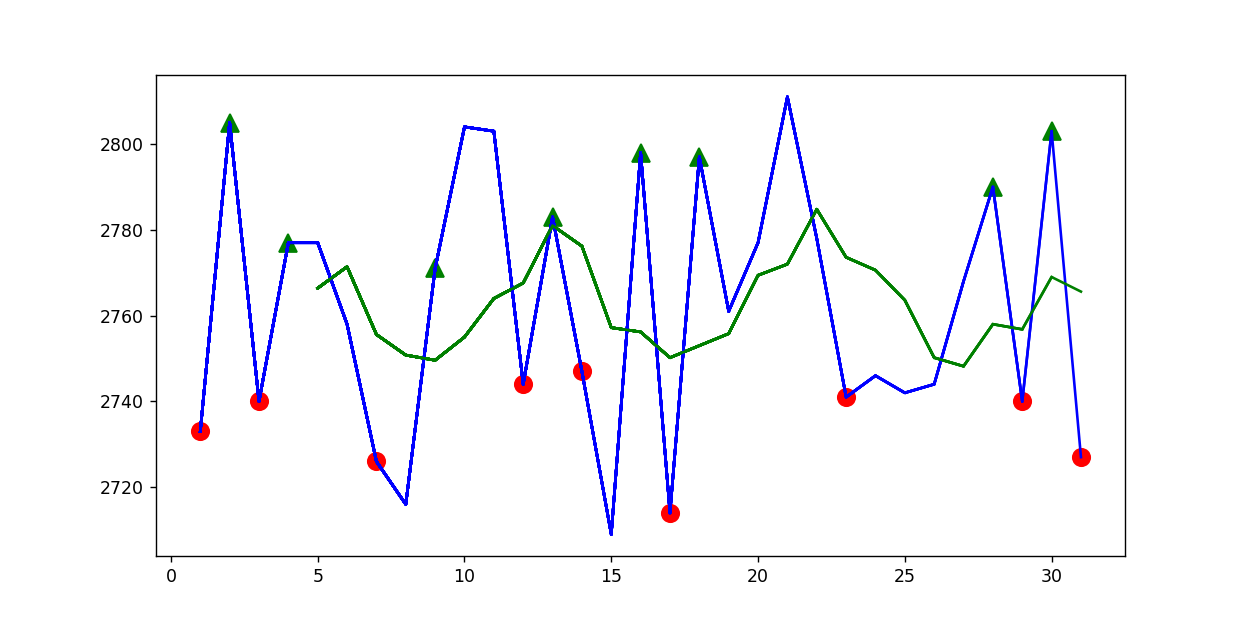

<bound method Figure.show of <Figure size 1000x500 with 1 Axes>>

In [13]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
fig.show

In [16]:

while True:
    
    #get the response from the website then clean it with 
    response=requests.get(stock_url,headers=headers)
    soup= BeautifulSoup(response.text,'html.parser')
    data_array=soup.find(id="responseDiv").getText().strip().split(":")
    i=i+1
    
    for item in data_array:
        if 'lastPrice' in item:
            index=data_array.index(item)+1
    

    prev_latest_price1=data_array[index].split('"')
    prev_latest_price=prev_latest_price1[1]
    
    prev_latest_price=prev_latest_price.replace(',', '') 
    
    
    
    time.sleep(1)
    response=requests.get(stock_url,headers=headers)
    soup= BeautifulSoup(response.text,'html.parser')
    data_array=soup.find(id="responseDiv").getText().strip().split(":")
    for item in data_array:
        if 'lastPrice' in item:
            index=data_array.index(item)+1
    latest_price1=data_array[index].split('"')
    latest_price=latest_price1[1]
    latest_price=(latest_price.replace(',', ''))

    
    #Random value for synthetic data when the market is inactive.
    #We can initialize to different values according to the swings of the instrument 
    value = randint(-50,50)
    value_2=randint(0,10)
    x=i
    y=float(latest_price)+value+value_2
    
    latest_price=y
    
    xs.append(x)
    ys.append(y)
    
    #print(xs)
    

   
    #plt.show()
    
    
    

    if (float(latest_price)<float(prev_latest_price)) and (enter==0): #This entry exit logic is the key algorithm
        enter=1
        entry_time = datetime.now()
        entry_time = entry_time.strftime("%d-%m-%Y %H:%M:%S")
        
        entry_price=float(latest_price)
        ax.plot(i,entry_price,color='r',marker='o',markersize=10)

        print("Entered Trade with buy price of:",entry_price)
    
    if (float(latest_price)> float(entry_price+30)) and enter==1:
        enter=0
        exit_time=datetime.now()
        exit_time = exit_time.strftime("%d-%m-%Y %H:%M:%S")
        exit_time_series.append(exit_time)
        exit_price=float(latest_price)
        pnll=exit_price-entry_price
        
        print("Exited Trade with a selling price of {exit_price} and with pnl of {pnll} ".format(exit_price=exit_price,pnll=pnll))
        
        ax.plot(i,exit_price,color='g',marker='^',markersize=10)
        #ax.plot(xs,ys,color='g',marker='^')
        entry_time_series.append(entry_time)
        pnl.append(pnll)
        entry.append(entry_price)
        exit.append(exit_price)
        
    
    ax.plot(xs,ys,color='b')
    
    #simple moving average calculated and displayed on the screen
    if len(ys)> timeperiod:
        

        output = talib.SMA(pd.Series(ys),timeperiod=5)
        ax.plot(xs,output,color='g')
    
    
    fig.canvas.draw()
    
    time.sleep(0.01)
    
    if i>30:
        break
        
      



Entered Trade with buy price of: 2733.0
Exited Trade with a selling price of 2805.0 and with pnl of 72.0 
Entered Trade with buy price of: 2740.0
Exited Trade with a selling price of 2777.0 and with pnl of 37.0 
Entered Trade with buy price of: 2726.0
Exited Trade with a selling price of 2771.0 and with pnl of 45.0 
Entered Trade with buy price of: 2744.0
Exited Trade with a selling price of 2783.0 and with pnl of 39.0 
Entered Trade with buy price of: 2747.0
Exited Trade with a selling price of 2798.0 and with pnl of 51.0 
Entered Trade with buy price of: 2714.0
Exited Trade with a selling price of 2797.0 and with pnl of 83.0 
Entered Trade with buy price of: 2741.0
Exited Trade with a selling price of 2790.0 and with pnl of 49.0 
Entered Trade with buy price of: 2740.0
Exited Trade with a selling price of 2803.0 and with pnl of 63.0 
Entered Trade with buy price of: 2727.0


In [17]:
df_tradelog = pd.DataFrame(columns=['Entry_Time','Exit_Time','Buy_Price','Sell_Price','Profit/Loss'])
df_tradelog['Entry_Time']=entry_time_series
df_tradelog['Exit_Time']=exit_time_series
df_tradelog['Buy_Price']=entry
df_tradelog['Sell_Price']=exit
df_tradelog['Profit/Loss']=pnl

In [18]:
df_tradelog

,Entry_Time,Exit_Time,Buy_Price,Sell_Price,Profit/Loss
0,11-03-2021 03:22:55,11-03-2021 03:22:56,2733.0,2805.0,72.0
1,11-03-2021 03:22:58,11-03-2021 03:22:59,2740.0,2777.0,37.0
2,11-03-2021 03:23:03,11-03-2021 03:23:05,2726.0,2771.0,45.0
3,11-03-2021 03:23:09,11-03-2021 03:23:10,2744.0,2783.0,39.0
4,11-03-2021 03:23:12,11-03-2021 03:23:14,2747.0,2798.0,51.0
5,11-03-2021 03:23:15,11-03-2021 03:23:17,2714.0,2797.0,83.0
6,11-03-2021 03:23:23,11-03-2021 03:23:29,2741.0,2790.0,49.0
7,11-03-2021 03:23:31,11-03-2021 03:23:32,2740.0,2803.0,63.0


After generating the tradelog we can generate the backtesting report and further analyse the algorithm.
We can export this data frame to multiple formats.

In [ ]:
i
